In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv("/Users/scharlottej13/Nextcloud/linkedin_recruiter/inputs/goers.csv")

In [3]:
df.head()

,country_dest,goers,date_key,users_dest,iso3_dest,pop_dest,gdp_dest,hdi_dest,region_dest,subregion_dest,midregion_dest,prop_dest,area_dest,internet_dest,bin_hdi_dest,bin_gdp_dest,eu_uk
0,France,163192,2020-07-25,19815261.0,fra,64843000.0,37124.0,0.82,Europe,Western Europe,Europe,0.305588,547557.0,0.820435,High,High,1.0
1,Cyprus,7041,2020-07-25,256128.0,cyp,1180000.0,29546.0,0.66,Asia,Western Asia,Western Asia,0.217058,9240.0,0.844336,Middle-high,Middle-high,1.0
2,Lebanon,7124,2020-07-25,517188.0,lbn,6819000.0,16315.0,0.51,Asia,Western Asia,Western Asia,0.075845,10230.0,0.781808,Middle,Middle,0.0
3,Jordan,11371,2020-07-25,595951.0,jor,9786000.0,11938.0,0.52,Asia,Western Asia,Western Asia,0.060898,88780.0,0.667903,Middle,Middle,0.0
4,Moldova,657,2020-07-25,201860.0,mda,4060000.0,6068.0,0.50,Europe,Eastern Europe,Eastern Europe & Central Asia,0.049719,32890.0,0.761245,Middle,Low-middle,0.0


In [9]:
df['ratio'] = df['goers'] / df['users_dest']

In [10]:
fig = px.choropleth(
    df, locations=df["iso3_dest"].str.upper(),
    color="ratio",
    hover_name="country_dest",
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame="date_key"
)
fig.show()

In [13]:
df.sort_values(by='ratio', ascending=False).drop_duplicates(['country_dest']).head(20)

,country_dest,goers,date_key,users_dest,iso3_dest,pop_dest,gdp_dest,hdi_dest,region_dest,subregion_dest,midregion_dest,prop_dest,area_dest,internet_dest,bin_hdi_dest,bin_gdp_dest,eu_uk,ratio
2824,Qatar,192560,2021-03-22,592020.0,qat,2725000.0,156299.0,0.63,Asia,Western Asia,Western Asia,0.217255,11490.000,0.996528,Middle-high,High,0.0,0.325259
2771,Monaco,8359,2021-03-22,33889.0,mco,38000.0,NaN,NaN,Europe,Western Europe,Europe,0.891816,2.027,0.970530,NaN,NaN,0.0,0.246658
2914,Oman,86647,2021-03-22,428350.0,omn,4666000.0,49847.0,0.53,Asia,Western Asia,Western Asia,0.091802,309500.000,0.801856,Middle,High,0.0,0.202281
2915,Bahrain,57385,2021-03-22,302031.0,bhr,1494000.0,41201.0,0.57,Asia,Western Asia,Western Asia,0.202163,780.000,0.986434,Middle-high,High,0.0,0.189997
2544,Luxembourg,38882,2021-02-23,235503.0,lux,592000.0,57471.0,NaN,Europe,Western Europe,Europe,0.397809,2430.000,0.970613,NaN,High,1.0,0.165102
2646,Kuwait,80092,2021-03-10,499343.0,kwt,4056000.0,95645.0,0.57,Asia,Western Asia,Western Asia,0.123112,17820.000,0.996000,Middle-high,High,0.0,0.160395
2850,United Arab Emirates,524358,2021-03-22,4051714.0,are,9487000.0,117197.0,0.59,Asia,Western Asia,Western Asia,0.427081,71020.000,0.984500,Middle-high,High,0.0,0.129416
1797,Singapore,278891,2021-01-12,2379553.0,sgp,5708000.0,65729.0,0.82,Asia,South-eastern Asia,Eastern Asia,0.416880,709.000,0.881656,High,High,0.0,0.117203
2420,South Sudan,3249,2021-02-23,28285.0,ssd,10911000.0,NaN,NaN,Africa,Sub-Saharan Africa,Africa,0.002592,631944.080,0.079774,NaN,NaN,0.0,0.114867
2886,Maldives,7972,2021-03-22,86035.0,mdv,496000.0,NaN,NaN,Asia,Southern Asia,Southern Asia,0.173458,300.000,0.631857,NaN,NaN,0.0,0.092660


In [14]:
df['ratio'].describe()

count    2514.000000
mean        0.024739
std         0.038219
min         0.000866
25%         0.006448
50%         0.013247
75%         0.024179
max         0.325259
Name: ratio, dtype: float64

In [15]:
fig = px.choropleth(
    df, locations=df["iso3_dest"].str.upper(),
    color="goers",
    hover_name="country_dest",
    color_continuous_scale=px.colors.sequential.Plasma,
    animation_frame="date_key"
)
fig.show()

In [16]:
df['goers'].describe()

count    2.919000e+03
mean     3.796057e+04
std      1.242274e+05
min      1.400000e+01
25%      1.074500e+03
50%      3.682000e+03
75%      1.694950e+04
max      1.306215e+06
Name: goers, dtype: float64

In [18]:
df[df['iso3_dest'].notnull()].sort_values(by='goers', ascending=False).drop_duplicates(['country_dest']).head(20)

,country_dest,goers,date_key,users_dest,iso3_dest,pop_dest,gdp_dest,hdi_dest,region_dest,subregion_dest,midregion_dest,prop_dest,area_dest,internet_dest,bin_hdi_dest,bin_gdp_dest,eu_uk,ratio
2839,United States,1046595,2021-03-22,170737895.0,usa,3.250850e+08,53015.0,0.78,Americas,Northern America,Northern America,0.525210,9147420.00,0.872661,High,High,0.0,0.006130
2848,Canada,626526,2021-03-22,18083880.0,can,3.673200e+07,43745.0,0.88,Americas,Northern America,Northern America,0.492320,8965590.00,0.910000,High,High,0.0,0.034646
2671,United Kingdom,620110,2021-03-10,29183995.0,gbr,6.672700e+07,37334.0,0.76,Europe,Northern Europe,Europe,0.437364,241930.00,0.948967,High,High,1.0,0.021248
2850,United Arab Emirates,524358,2021-03-22,4051714.0,are,9.487000e+06,117197.0,0.59,Asia,Western Asia,Western Asia,0.427081,71020.00,0.984500,Middle-high,High,0.0,0.129416
2817,Australia,384883,2021-03-22,11643410.0,aus,2.458500e+07,48845.0,0.89,Oceania,Australia and New Zealand,Oceania,0.473598,7692020.00,0.865450,High,High,0.0,0.033056
2655,Germany,286243,2021-03-10,11691164.0,deu,8.265800e+07,44689.0,0.80,Europe,Western Europe,Europe,0.141440,349370.00,0.897391,High,High,1.0,0.024484
1797,Singapore,278891,2021-01-12,2379553.0,sgp,5.708000e+06,65729.0,0.82,Asia,South-eastern Asia,Eastern Asia,0.416880,709.00,0.881656,High,High,0.0,0.117203
2666,Spain,198789,2021-03-10,14047367.0,esp,4.664700e+07,33801.0,0.85,Europe,Southern Europe,Europe,0.301142,499547.35,0.861072,High,High,1.0,0.014151
2663,Switzerland,192721,2021-03-10,2883815.0,che,8.456000e+06,59662.0,0.80,Europe,Western Europe,Europe,0.341038,39516.03,0.896861,High,High,0.0,0.066828
2824,Qatar,192560,2021-03-22,592020.0,qat,2.725000e+06,156299.0,0.63,Asia,Western Asia,Western Asia,0.217255,11490.00,0.996528,Middle-high,High,0.0,0.325259


In [20]:
top_20 = df[df['iso3_dest'].notnull()].sort_values(by='goers', ascending=False).drop_duplicates(['country_dest']).head(20)['country_dest'].unique()

<ipython-input-30-930d3a4d1cb4>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-30-930d3a4d1cb4>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Top 20 destination countries, by number of people open to relocation')

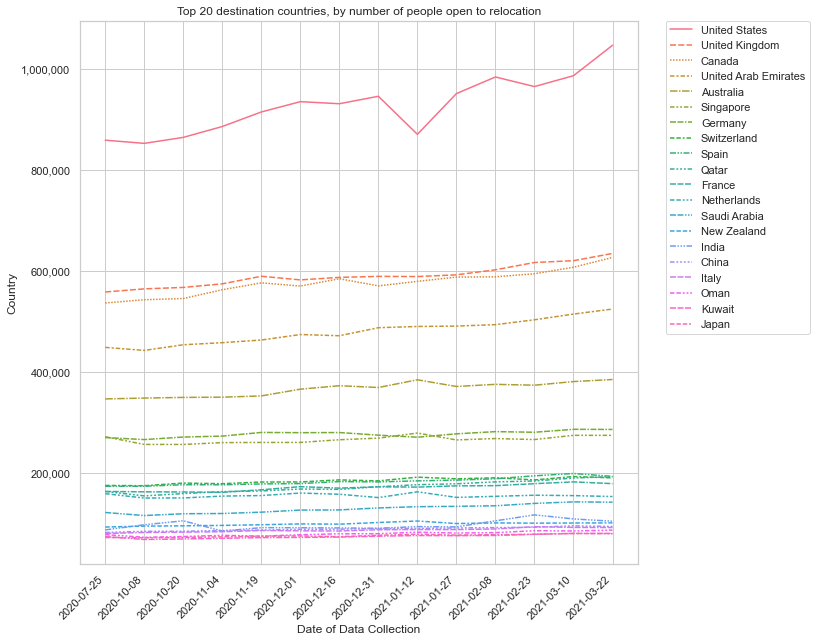

In [30]:
x = df[df['country_dest'].isin(top_20)].sort_values(by=['date_key', 'goers'], ascending=[True, False])
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    data=x, x=x['date_key'], y=x['goers'],
    hue=x['country_dest'], style=x['country_dest']
)
ax.set_xticklabels(x['date_key'].unique(), rotation=45, horizontalalignment='right')
ticks_loc = ax.get_yticks().tolist()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date of Data Collection')
plt.ylabel('Country')
plt.title('Top 20 destination countries, by number of people open to relocation')

<ipython-input-32-12a2806986c1>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-32-12a2806986c1>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, '"Zoomed in" Top 13-20 destination countries, by number of people open to relocation')

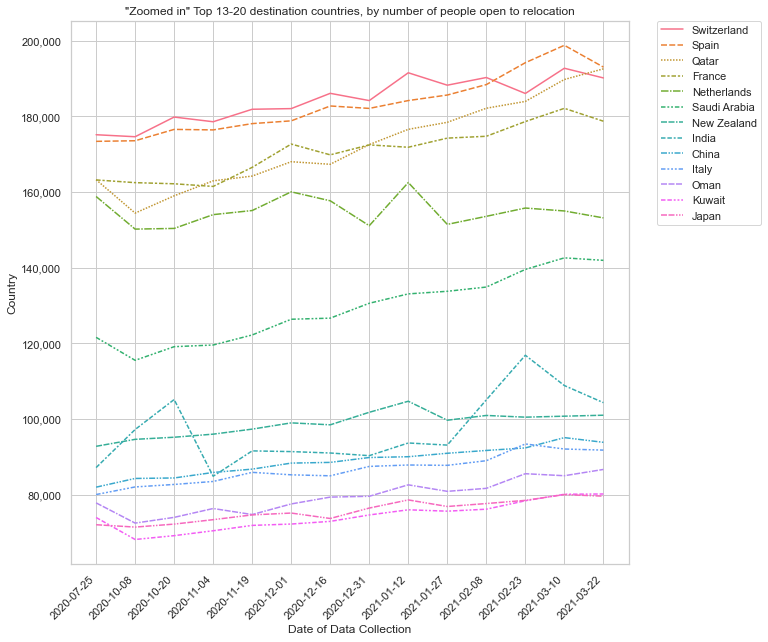

In [32]:
x = df[
    (df['country_dest'].isin(top_20)) & (df['goers'] <= 250000)
].sort_values(by=['date_key', 'goers'], ascending=[True, False])
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    data=x, x=x['date_key'], y=x['goers'],
    hue=x['country_dest'], style=x['country_dest']
)
ax.set_xticklabels(x['date_key'].unique(), rotation=45, horizontalalignment='right')
ticks_loc = ax.get_yticks().tolist()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date of Data Collection')
plt.ylabel('Country')
plt.title('"Zoomed in" Top 13-20 destination countries, by number of people open to relocation')

<ipython-input-35-1d5932cc1f41>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-35-1d5932cc1f41>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, '"Zoomed in" Top 6 destination countries (without US), by number of people open to relocation')

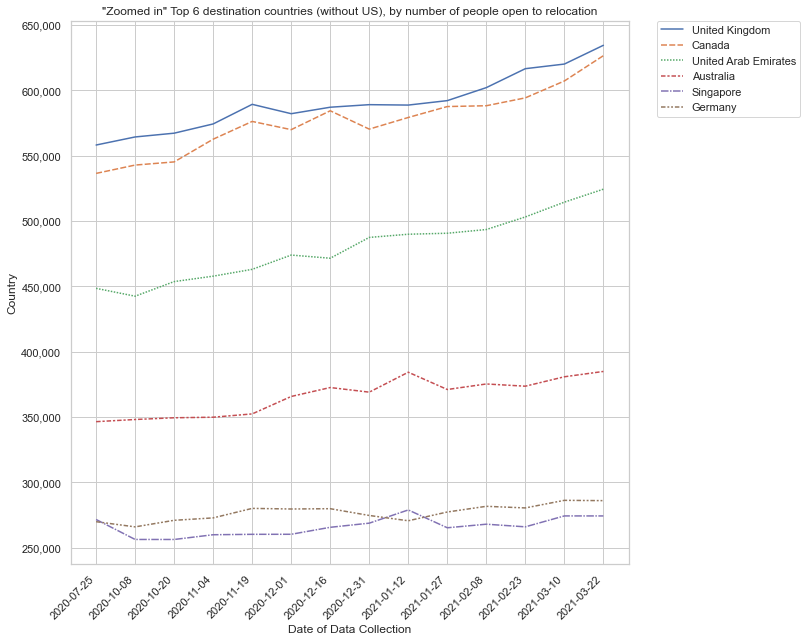

In [35]:
x = df[
    (df['country_dest'].isin(top_20)) & (df['goers'] >= 250000) & (df['country_dest'] != 'United States')
].sort_values(by=['date_key', 'goers'], ascending=[True, False])
plt.figure(figsize=(10,10))
ax = sns.lineplot(
    data=x, x=x['date_key'], y=x['goers'],
    hue=x['country_dest'], style=x['country_dest']
)
ax.set_xticklabels(x['date_key'].unique(), rotation=45, horizontalalignment='right')
ticks_loc = ax.get_yticks().tolist()
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Date of Data Collection')
plt.ylabel('Country')
plt.title('"Zoomed in" Top 6 destination countries (without US), by number of people open to relocation')